Convert practical salinity open boundary files to TEOS-10 reference salinity open boundary files

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import teos_tools
%matplotlib inline

Read in the original practical salinity file

In [2]:
practical_data = nc.Dataset('../../../NEMO-forcing/open_boundaries/west/SalishSea2_Masson_corrected.nc')
practical_salinity = practical_data.variables['vosaline'][:]
print (practical_salinity.shape)

(52, 40, 1, 870)


Now we have to work around a bug in netcdf4 library.  We want to change the attributes of the vosaline 
variable, but this crashes.  So instead we go out to the command line and copy the file and change the vosaline attributes. Note ncatted is only available on some machines, e.g. Salish

cp ../../../NEMO-forcing/open_boundaries/west/SalishSea2_Masson_corrected.nc SalishSea_west_TEOS10.nc   
ncatted -O -a units,vosaline,m,c,'g/kg' SalishSea_west_TEOS10.nc   
ncatted -O -a long_name,vosaline,m,c,'Reference Salinity' SalishSea_west_TEOS10.nc   
ncatted -O -h -a history,global,a,c,'[2016-01-23] Converted to Reference Salinity' SalishSea_west_TEOS10.nc   
ncatted -O -h -a title,global,o,c,'Modified boundary conditions based on weekly climatolgy from Diane Masson converted to TEOS' SalishSea_west_TEOS10.nc   
ncatted -O -h -a source,global,a,c,'https://bitbucket.org/salishsea/tools/src/tip/I_ForcingFiles/OBC/TEOSfromPracticalOBC.ipynb' SalishSea_west_TEOS10.nc   
ncatted -O -h -a comment,global,a,c,'Converted to Reference Salinity (TEOS-10)' SalishSea_west_TEOS10.nc   
ncatted -O -h -a references,global,a,c,'https://bitbucket.org/salishsea/nemo-forcing/src/tip/open_boundaries/west/SalishSea_west_TEOS10.nc' SalishSea_west_TEOS10.nc

In [4]:
TEOS_data = nc.Dataset('SalishSea_west_TEOS10.nc', 'r+')
print (nc_tools.show_variable_attrs(TEOS_data))
print (nc_tools.show_dataset_attrs(TEOS_data))

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T Levels
    units: m
    positive: down
    valid_range: [   4.  428.]
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(yb, xbT)
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (1, 870)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(yb, xbT)
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (1, 870)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
int32 nbidta(yb, xbT)
    long_name: i grid position
    units: 1
unlimited dimensions: 
current shape = (1, 870)
filling on, default _FillValue of -2147483647 used

<class 'netCDF4._netCDF4.Variable'>
int32 nbjdta(yb, xbT)
    long_name: j grid position
    uni

In [5]:
print (practical_salinity[26,20,0,40],teos_tools.psu_teos(practical_salinity[26,20,0,40]))

32.0997 32.2510379458


In [6]:
ref_sal = np.zeros_like(practical_salinity)
ref_sal = teos_tools.psu_teos(practical_salinity)

1.00472


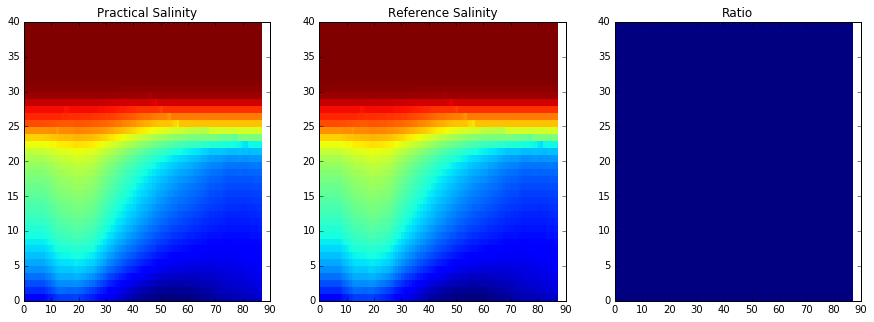

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
i = 26; k=0; l1=0; l2=87
ax[0].pcolormesh(practical_salinity[i,:,k,l1:l2])
ax[0].set_title('Practical Salinity')
ax[1].pcolormesh(ref_sal[i,:,k,l1:l2])
ax[1].set_title('Reference Salinity')
ax[2].pcolormesh(ref_sal[i,:,k,l1:l2]/practical_salinity[i,:,k,l1:l2])
ax[2].set_title('Ratio')
print (ref_sal[i,10,k,42]/practical_salinity[i,10,k,42])

In [8]:
vosaline = TEOS_data.variables['vosaline']
vosaline[:] = ref_sal

In [9]:
TEOS_data.close()